In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import reuters
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data()

In [3]:
x_train.shape, x_test.shape

((8982,), (2246,))

In [4]:
np.unique(y_train, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64),
 array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
         390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
          15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
          11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
          12,   18], dtype=int64))

- 로이터 뉴스 카테고리 분류 데이터
    - 총 11258개의 뉴스 기사 데이터
    - 46개의 카테고리 분류
    - 예)
        - 중부 지방은 대체로 맑겠으나, 남부 지방은 구름이 많겠습니다 -> 날씨
        - 올 초부터 유동성의 힘으로 주가가 일정하게 상승했습니다 -> 주식

In [5]:
# 단어 사전
word_index = reuters.get_word_index()

In [6]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [10]:
x_train[0]

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [11]:
idx2word = {0 : "<PAD>", 1 : "<s>", 2 : "<UNK>"}

In [12]:
idx2word.update({value + 3 : key for key, value in word_index.items()})

In [13]:
" ".join(map(lambda x: idx2word[x], x_train[0]))

'<s> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [14]:
# 전체 단어 수
len(word_index.keys())

30979

In [20]:
# hyperparameter
VOCAB_SIZE = 800
MAX_LEN = 100
CLASSES = len(np.unique(y_train))

In [21]:
# 단어 수 설정 후 다시 data load
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = VOCAB_SIZE)

In [22]:
word_index = reuters.get_word_index()
idx2word = {0 : "<PAD>", 1 : "<S>", 2 : "<UNK>"}
idx2word.update({value + 3 : key for key, value in word_index.items()})

for i in range(5):
    print(f"{i}번째 data")
    print(" ".join(map(lambda x: idx2word[x], x_train[i])), end = "\n\n")

0번째 data
<S> <UNK> <UNK> said as a result of its december acquisition of <UNK> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said <UNK> net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <UNK> <UNK> revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash <UNK> per share this year should be 2 50 to three dlrs reuter 3

1번째 data
<S> <UNK> de <UNK> <UNK> lt <UNK> <UNK> and lt <UNK> <UNK> corp of <UNK> have each taken 50 pct <UNK> in <UNK> company <UNK> <UNK> <UNK> <UNK> de <UNK> said in a statement it <UNK> no financial details of the transaction <UNK> <UNK> <UNK> turnover in 1986 was 17 5 billion <UNK> francs reuter 3

2번째 data
<S> shr 3 28 dlrs vs 22 cts shr <UNK> 2 <UNK> dlrs vs 22 cts net 46 0 mln vs 3 <UNK> 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr <UNK> 4 <UNK> dlrs vs 1 50 dlrs net <UNK> 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share <UNK> the tw

In [23]:
# 데이터 길이 분석
length = np.array([len(x) for x in x_train])

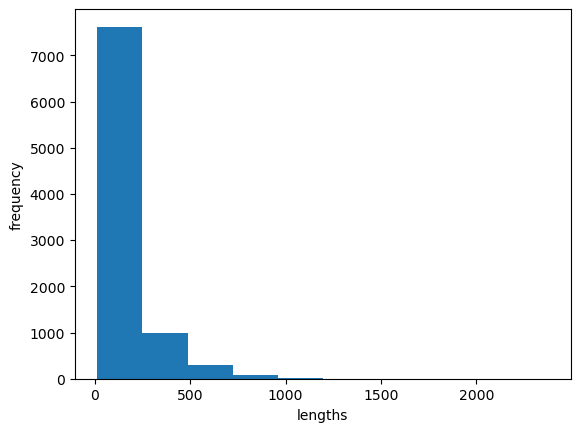

In [25]:
plt.figure()

plt.hist(length)

plt.xlabel("lengths")
plt.ylabel("frequency")
plt.show()

In [26]:
np.mean(length)

145.5398574927633

In [27]:
np.quantile(length, [0.25, 0.5, 0.75])

array([ 60.,  95., 179.])

In [28]:
np.max(length)

2376

In [29]:
# 종속변수 종류 수 확인
len(np.unique(y_train))

46

In [30]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                              stratify = y_train, random_state = 5)

In [43]:
# 데이터 길이 전처리
sub_seq = pad_sequences(x_sub, maxlen = MAX_LEN, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = MAX_LEN, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = MAX_LEN, truncating = "post")

In [44]:
sub_seq.shape

(7185, 100)

In [45]:
model = keras.Sequential()
model.add(keras.layers.Embedding(VOCAB_SIZE, 128, input_length = MAX_LEN))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(64, 5, activation = "relu"))
model.add(keras.layers.MaxPool1D(4))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(CLASSES, activation = "softmax"))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          102400    
                                                                 
 dropout_2 (Dropout)         (None, 100, 128)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 64)            41024     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                      

In [47]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [48]:
history = model.fit(sub_seq, y_sub, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, y_val),
                    callbacks = [early_stopping_cb])

Epoch 1/100
113/113 [==============================] - 9s 47ms/step - loss: 2.3738 - accuracy: 0.4295 - val_loss: 1.8539 - val_accuracy: 0.5242
Epoch 2/100
113/113 [==============================] - 4s 36ms/step - loss: 1.6902 - accuracy: 0.5769 - val_loss: 1.5664 - val_accuracy: 0.6166
Epoch 3/100
113/113 [==============================] - 4s 35ms/step - loss: 1.5080 - accuracy: 0.6253 - val_loss: 1.4451 - val_accuracy: 0.6422
Epoch 4/100
113/113 [==============================] - 4s 38ms/step - loss: 1.3667 - accuracy: 0.6633 - val_loss: 1.3649 - val_accuracy: 0.6644
Epoch 5/100
113/113 [==============================] - 4s 37ms/step - loss: 1.2718 - accuracy: 0.6823 - val_loss: 1.2817 - val_accuracy: 0.6767
Epoch 6/100
113/113 [==============================] - 4s 37ms/step - loss: 1.1737 - accuracy: 0.7111 - val_loss: 1.1773 - val_accuracy: 0.7156
Epoch 7/100
113/113 [==============================] - 4s 36ms/step - loss: 1.0895 - accuracy: 0.7312 - val_loss: 1.1261 - val_accuracy:

In [49]:
model.evaluate(test_seq, y_test)

71/71 [==============================] - 1s 8ms/step - loss: 1.0314 - accuracy: 0.7645


[1.0314202308654785, 0.7644701600074768]

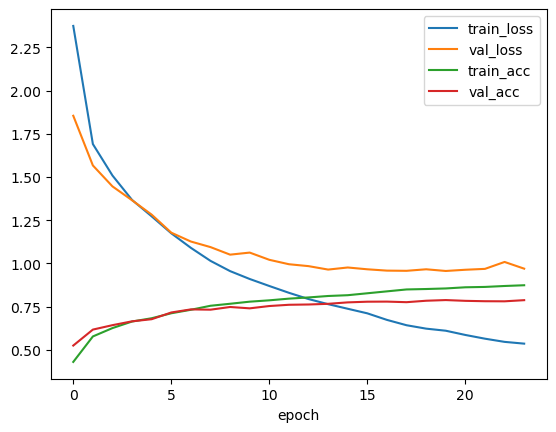

In [50]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()